## Exploración de los datos


In [5]:
import pandas as pd
import json

# Rutas de los archivos
csv_path = 'C:/Users/papit/OneDrive/Desktop/PROGRA/FRvideos_cc50_202101.csv'
json_path = 'C:/Users/papit/OneDrive/Desktop/PROGRA/FR_category_id.json'

#Cargar el archivo CSV
df_fr = pd.read_csv(csv_path)
print("Archivo CSV cargado correctamente.")
print("Dimensión del dataset:", df_fr.shape)

#Cargar el archivo JSON
with open(json_path, encoding='utf-8') as f:
    category_data = json.load(f)

print("Archivo JSON cargado correctamente.")
print("Cantidad de categorías en el archivo JSON:", len(category_data['items']))


Archivo CSV cargado correctamente.
Dimensión del dataset: (40724, 20)
Archivo JSON cargado correctamente.
Cantidad de categorías en el archivo JSON: 31


In [110]:
# Crear diccionario de categorías
category_dict = {int(item['id']): item['snippet']['title'] for item in category_data['items']}

# Agregar categorías faltantes detectadas en el CSV
category_dict.update({
    2: "Trailers",
    29: "Nonprofits & Activism",
    30: "Movies (User-generated)",
    43: "Shows",
    44: "Trailers / Promos"
})

In [111]:
# Mapear nombres de categoría al DataFrame
df_fr['category_name'] = df_fr['category_id'].map(category_dict)

# Convertir columnas de fecha
df_fr['trending_date'] = pd.to_datetime(df_fr['trending_date'], format='%y.%d.%m', errors='coerce')
df_fr['publish_time'] = pd.to_datetime(df_fr['publish_time'], errors='coerce')

print("Carga de datos finalizada.")

Carga de datos finalizada.


## Carga, inspeccion, visualizacion y verificacion de los datos 

In [112]:
# Mostrar columnas como tabla con estilo
columnas_df = pd.DataFrame(df_fr.columns, columns=["Nombre de Columna"])
columnas_df.style.set_caption("Columnas del DataFrame").background_gradient(cmap='PuBu')

,Nombre de Columna
0,video_id
1,trending_date
2,title
3,channel_title
4,category_id
5,publish_time
6,tags
7,views
8,likes
9,dislikes


In [113]:
print("\nDimensión del DataFrame (filas, columnas):", df_fr.shape)


Dimensión del DataFrame (filas, columnas): (40724, 21)


In [114]:
# Convertir los tipos de datos en un DataFrame
tipos_df = df_fr.dtypes.reset_index()
tipos_df.columns = ['Columna', 'Tipo de Dato']

# Visualizar con estilo
tipos_df.style.set_caption("Tipos de datos por columna").background_gradient(cmap='Greens')


,Columna,Tipo de Dato
0,video_id,object
1,trending_date,datetime64[ns]
2,title,object
3,channel_title,object
4,category_id,int64
5,publish_time,"datetime64[ns, UTC]"
6,tags,object
7,views,int64
8,likes,int64
9,dislikes,int64


In [115]:
print("\nPrimeras filas del dataset:")
print(df_fr.head())


Primeras filas del dataset:
      video_id trending_date  \
0  Ro6eob0LrCY    2017-11-14   
1  Yo84eqYwP98    2017-11-14   
2  ceqntSXE-10    2017-11-14   
3  WuTFI5qftCE    2017-11-14   
4  ee6OFs8TdEg    2017-11-14   

                                               title        channel_title  \
0           Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1  LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2  DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...      Daniil le Russe   
3                    PAPY GRENIER - METAL GEAR SOLID    Joueur Du Grenier   
4  QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...    Aurelien Fontenoy   

   category_id              publish_time  \
0           24 2017-11-13 17:32:55+00:00   
1           24 2017-11-12 15:00:02+00:00   
2           23 2017-11-13 17:00:38+00:00   
3           20 2017-11-12 17:00:02+00:00   
4           17 2017-11-13 16:30:03+00:00   

                                                ta

In [116]:
print("\nValores únicos en 'category_id':")
print(df_fr['category_id'].unique())


Valores únicos en 'category_id':
[24 23 20 17 22 27 26 28  2 25  1 10 43 19 15 29 30 44]


In [86]:
# Crear un DataFrame con los category_id y category_name únicos
categorias = df_fr[['category_id', 'category_name']].drop_duplicates().sort_values('category_id')
categorias.reset_index(drop=True, inplace=True)
# Mostrar la tabla 
categorias.style.set_caption("Categorías disponibles en el dataset").background_gradient(cmap='Pastel1')


,category_id,category_name
0,1,Film & Animation
1,2,Trailers
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,19,Travel & Events
6,20,Gaming
7,22,People & Blogs
8,23,Comedy
9,24,Entertainment


In [87]:
# Verificar si hay filas duplicadas
print("\nCantidad de filas duplicadas:")
print(df_fr.duplicated().sum())


Cantidad de filas duplicadas:
0


In [117]:
nulos_df = df_fr.isnull().sum().reset_index()
nulos_df.columns = ['Columna', 'Valores Nulos']

nulos_df.style.background_gradient(cmap='Oranges').set_caption("Valores nulos por columna")


,Columna,Valores Nulos
0,video_id,0
1,trending_date,0
2,title,0
3,channel_title,0
4,category_id,0
5,publish_time,0
6,tags,0
7,views,0
8,likes,0
9,dislikes,0


In [118]:
# Revisión de valores únicos en columnas categóricas
print("Valores únicos en 'comments_disabled':", df_fr['comments_disabled'].unique())
print("Valores únicos en 'ratings_disabled':", df_fr['ratings_disabled'].unique())
print("Valores únicos en 'state':", df_fr['state'].unique())


Valores únicos en 'comments_disabled': [False  True]
Valores únicos en 'ratings_disabled': [False  True]
Valores únicos en 'state': ['Ile De France' 'Corse' 'Limousin' 'Moyotte' 'Pays De La Loire'
 'Martinique' 'Guadeloupe' 'Bourgogne' 'Poitou Charentes' 'Alsace'
 'Basse Normandie' "Provence Alpes Cote D'azur" 'Bretagne' 'Guinaa'
 'Centre' 'Haute Normandie' 'Auvergne' 'Champagne Ardenne' 'Aquitaine'
 'Amapa' 'Picardie' 'Lorraine' 'Nord Pas De Calais' 'La Reunion'
 'Languedoc Roussillon' 'Rhone Alpes' 'Midi Pyrenees' 'Franche Comte']


### Matriz de correlacion 

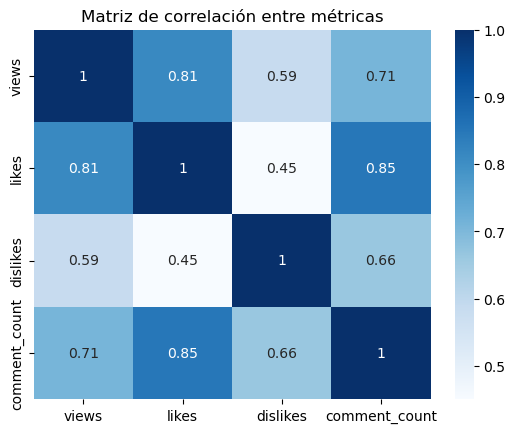

In [119]:
corr = df_fr[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Matriz de correlación entre métricas")
plt.show()


### Frecuencia por categoria

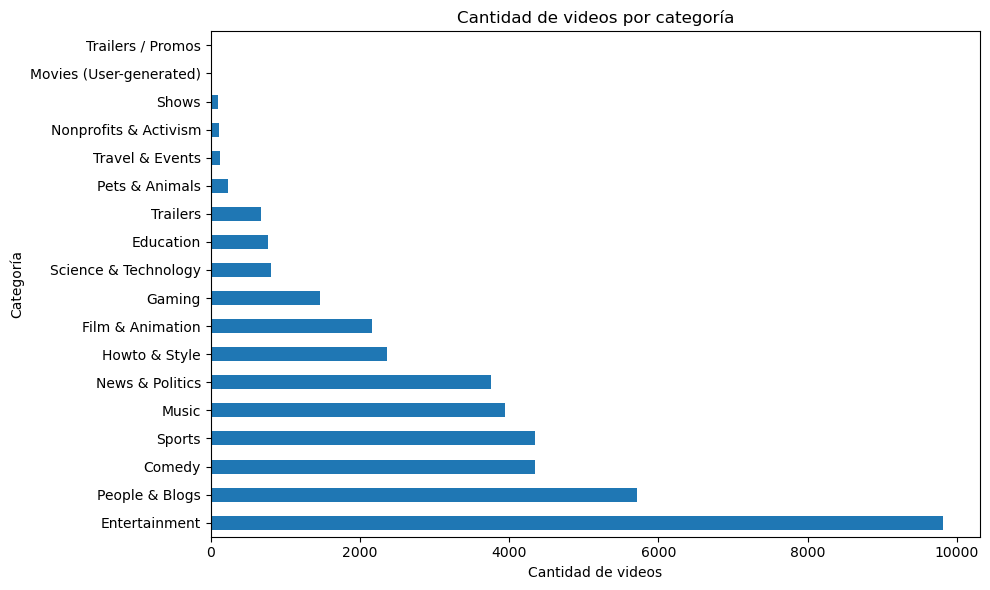

In [120]:
# Conteo de videos por categoría
df_fr['category_name'].value_counts().plot(kind='barh', figsize=(10,6))
plt.title("Cantidad de videos por categoría")
plt.xlabel("Cantidad de videos")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()


## Limpieza de los datos

In [121]:
# Corregir errores tipográficos en la columna 'state'
df_fr['state'] = df_fr['state'].replace({
    'Guinaa': 'Guyane',
    'Amapa': 'Desconocido'
})


In [122]:
# Revisar valores únicos corregidos
print("Valores únicos actualizados en 'state':")
print(sorted(df_fr['state'].unique()))


Valores únicos actualizados en 'state':
['Alsace', 'Aquitaine', 'Auvergne', 'Basse Normandie', 'Bourgogne', 'Bretagne', 'Centre', 'Champagne Ardenne', 'Corse', 'Desconocido', 'Franche Comte', 'Guadeloupe', 'Guyane', 'Haute Normandie', 'Ile De France', 'La Reunion', 'Languedoc Roussillon', 'Limousin', 'Lorraine', 'Martinique', 'Midi Pyrenees', 'Moyotte', 'Nord Pas De Calais', 'Pays De La Loire', 'Picardie', 'Poitou Charentes', "Provence Alpes Cote D'azur", 'Rhone Alpes']


In [7]:
df_fr['description'] = df_fr['description'].fillna('Sin descripción')


In [8]:
nulos_df = df_fr.isnull().sum().reset_index()
nulos_df.columns = ['Columna', 'Valores Nulos']

nulos_df.style.background_gradient(cmap='Oranges').set_caption("Valores nulos por columna")


,Columna,Valores Nulos
0,video_id,0
1,trending_date,0
2,title,0
3,channel_title,0
4,category_id,0
5,publish_time,0
6,tags,0
7,views,0
8,likes,0
9,dislikes,0


## PRE-procesar los datos

In [125]:
# Resumen estadístico después de limpieza
print("Resumen estadístico actual:")
print(df_fr[columnas].describe())


Resumen estadístico actual:
              views         likes      dislikes  comment_count
count  4.072400e+04  4.072400e+04  4.072400e+04   4.072400e+04
mean   4.199219e+05  1.738886e+04  8.149624e+02   1.832453e+03
std    1.772130e+06  8.720509e+04  1.139219e+04   1.404321e+04
min    2.230000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    1.697450e+04  3.380000e+02  1.800000e+01   5.600000e+01
50%    7.372100e+04  1.892500e+03  8.300000e+01   2.350000e+02
75%    2.708088e+05  7.969500e+03  3.350000e+02   8.410000e+02
max    1.009116e+08  4.750254e+06  1.353661e+06   1.040912e+06


In [200]:
# Columnas a revisar
columnas_numericas = ['views', 'likes', 'dislikes', 'comment_count']

# Revisar si existen valores negativos
valores_negativos = df_fr[columnas_numericas] < 0

# Mostrar cantidad de valores negativos por columna
print("Cantidad de valores negativos por columna:")
print(valores_negativos.sum())

# Filtrar filas que contienen al menos un valor negativo
filas_con_negativos = df_fr[valores_negativos.any(axis=1)]
print(f"\nFilas con valores negativos: {len(filas_con_negativos)}")
display(filas_con_negativos)


Cantidad de valores negativos por columna:
views            0
likes            0
dislikes         0
comment_count    0
dtype: int64

Filas con valores negativos: 0


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,views_scaled,likes_scaled,dislikes_scaled,comment_count_scaled,cluster,pca1,pca2,like_dislike_ratio,views_comments_ratio,day


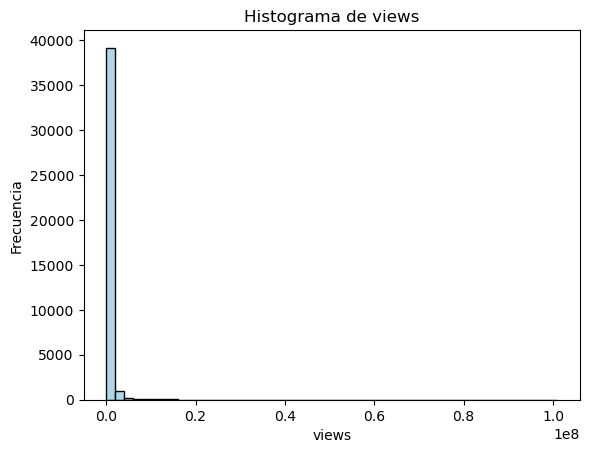

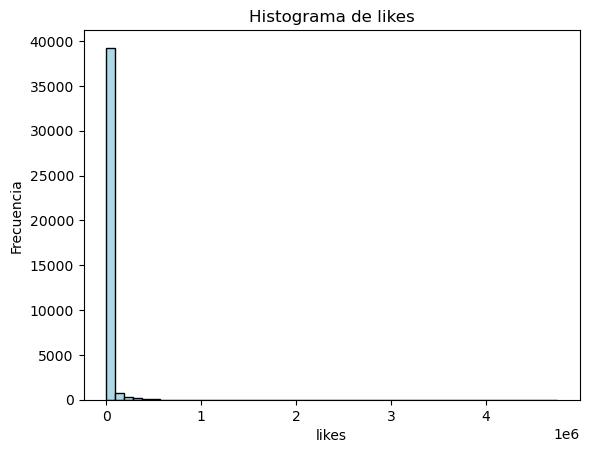

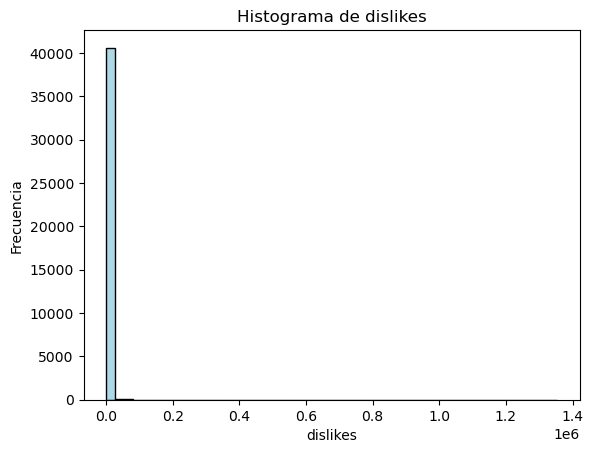

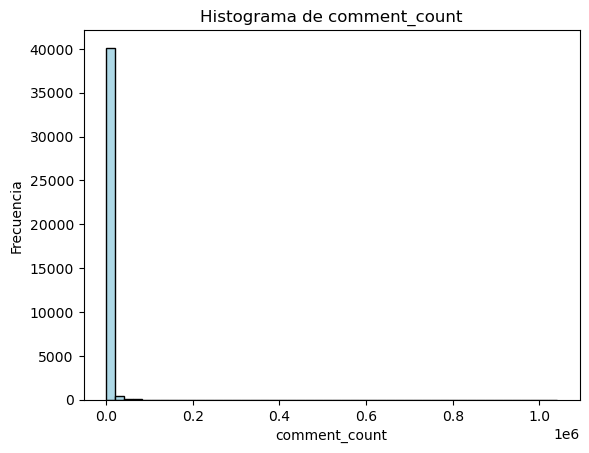

In [133]:
import matplotlib.pyplot as plt

# Lista de columnas numéricas
columnas = ['views', 'likes', 'dislikes', 'comment_count']

# Histogramas simples
for col in columnas:
    plt.hist(df_fr[col], bins=50, color='lightblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()



In [139]:
for col in columnas:
    Q1 = df_fr[col].quantile(0.25)
    Q3 = df_fr[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_fr[(df_fr[col] < Q1 - 1.5 * IQR) | (df_fr[col] > Q3 + 1.5 * IQR)]
    
    print(f"{col}: {len(outliers)} valores atípicos")


views: 5163 valores atípicos
likes: 5695 valores atípicos
dislikes: 5174 valores atípicos
comment_count: 5078 valores atípicos


In [130]:
import numpy as np

# Crear nuevas columnas con log1p (log(1 + x)) para evitar log(0)
df_fr['views_log'] = np.log1p(df_fr['views'])
df_fr['likes_log'] = np.log1p(df_fr['likes'])
df_fr['dislikes_log'] = np.log1p(df_fr['dislikes'])
df_fr['comment_count_log'] = np.log1p(df_fr['comment_count'])


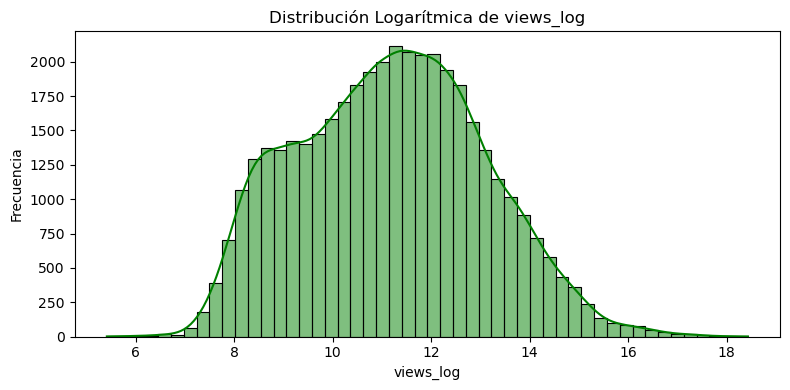

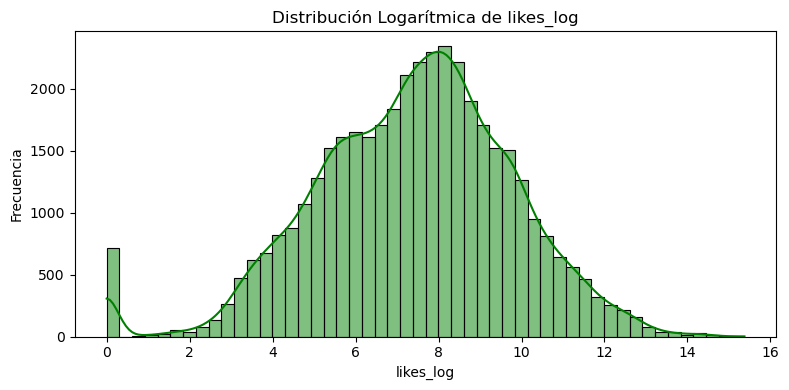

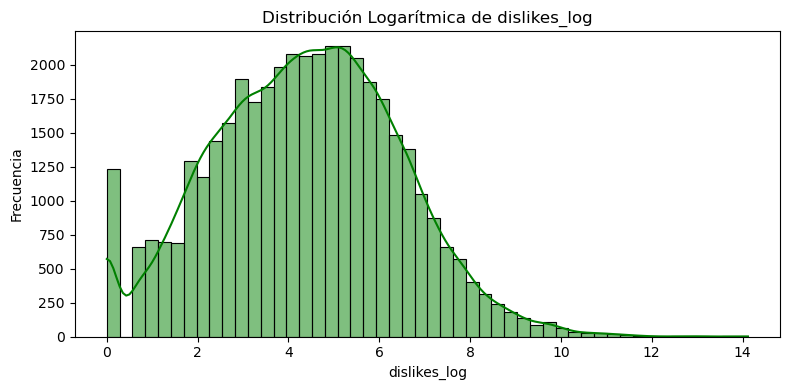

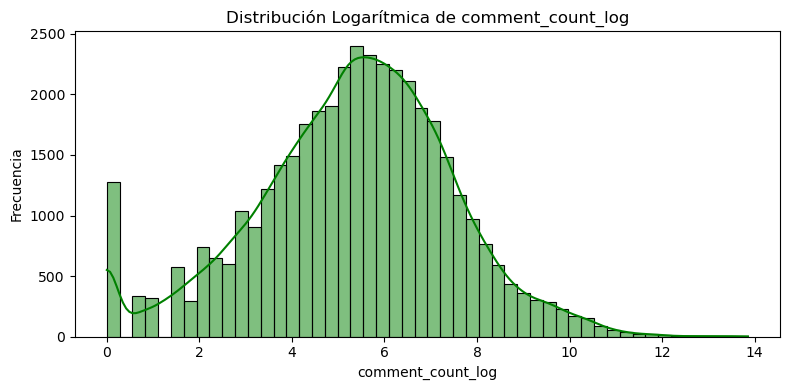

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas_log = ['views_log', 'likes_log', 'dislikes_log', 'comment_count_log']

for col in columnas_log:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_fr[col], bins=50, kde=True, color='green')
    plt.title(f'Distribución Logarítmica de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


## Construccion  de los nuevos datos

In [137]:
# Porcentaje de likes sobre total de interacciones
df_fr['like_ratio'] = df_fr['likes'] / (df_fr['likes'] + df_fr['dislikes'])

# Tasa de comentarios por visualización
df_fr['comments_per_view'] = df_fr['comment_count'] / df_fr['views']

# Engagement total (likes + dislikes + comentarios) / vistas
df_fr['engagement_rate'] = (df_fr['likes'] + df_fr['dislikes'] + df_fr['comment_count']) / df_fr['views']


In [138]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_fr[['views_scaled', 'likes_scaled', 'dislikes_scaled', 'comment_count_scaled']] = scaler.fit_transform(
    df_fr[['views', 'likes', 'dislikes', 'comment_count']]
)


In [135]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
df_fr.to_csv("C:/Users/papit/OneDrive/Desktop/PROGRA/FRvideos_limpio.csv", index=False, encoding='utf-8')


## MODELADO


In [141]:
import pandas as pd

# Cargar el CSV limpio exportado previamente
df_fr = pd.read_csv("C:/Users/papit/OneDrive/Desktop/PROGRA/FRvideos_limpio.csv")

features = ['views', 'likes', 'dislikes', 'comment_count', 'like_ratio', 'comments_per_view', 'engagement_rate']


In [142]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_fr[features])


In [ ]:
# Revisión visual de valores nulos en las variables seleccionadas
nulos_features = df_fr[features].isnull().sum().reset_index()
nulos_features.columns = ['Variable', 'Cantidad de NaN']

# Visualizar 
nulos_features.style.set_caption("Valores nulos por variable").background_gradient(cmap='Oranges')


,Variable,Cantidad de NaN
0,views,0
1,likes,0
2,dislikes,0
3,comment_count,0
4,like_ratio,0
5,comments_per_view,0
6,engagement_rate,0


In [164]:
df_fr['like_ratio'] = df_fr['like_ratio'].fillna(0)


In [150]:
X_scaled = scaler.fit_transform(df_fr[features])


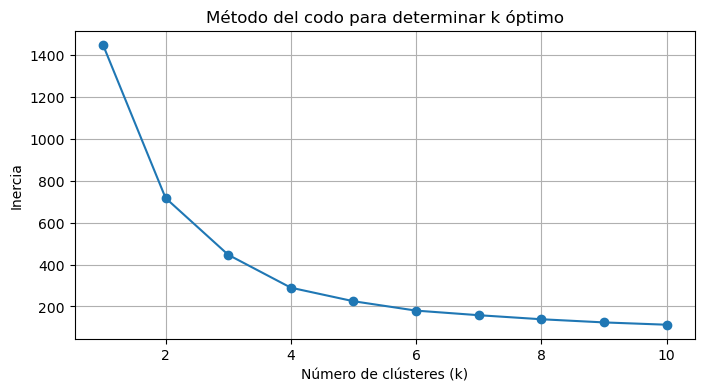

In [151]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del codo para determinar k óptimo')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


In [195]:
k_optimo = 4  
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df_fr['cluster'] = kmeans.fit_predict(X_scaled)


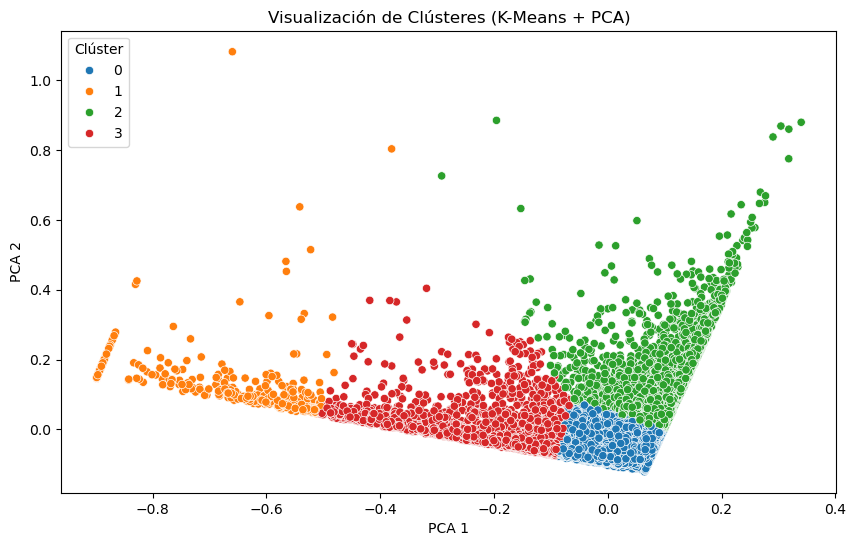

In [196]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_fr['pca1'] = X_pca[:, 0]
df_fr['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fr, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title('Visualización de Clústeres (K-Means + PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Clúster')
plt.show()


In [161]:
# Crear tabla con cantidad de videos por clúster
tabla_clusters = df_fr['cluster'].value_counts().sort_index().reset_index()
tabla_clusters.columns = ['Cluster', 'Cantidad de videos']

# Visualizar 
tabla_clusters.style.set_caption("Cantidad de videos por clúster").background_gradient(cmap='Blues')


,Cluster,Cantidad de videos
0,0,22352
1,1,990
2,2,12487
3,3,4895


In [162]:

# Ver estadísticas por clúster
agrupado = df_fr.groupby('cluster')[features].mean()
print(agrupado)

                 views         likes     dislikes  comment_count  like_ratio  \
cluster                                                                        
0        482891.339970  13269.493558   630.351423    1294.179894    0.941532   
1        404499.549495    734.413131  1591.809091     593.125253    0.078539   
2        352360.653079  31399.775126   781.238888    3168.304076    0.975839   
3        307850.497242   3826.007967  1586.862513    1133.296834    0.727158   

         comments_per_view  engagement_rate  
cluster                                      
0                 0.003129         0.028985  
1                 0.004434         0.009026  
2                 0.013122         0.111688  
3                 0.003598         0.014635  


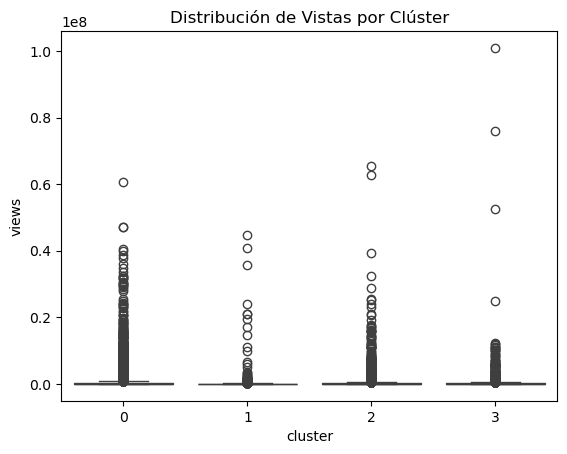

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot por clúster para ver diferencias en vistas
sns.boxplot(x='cluster', y='views', data=df_fr)
plt.title('Distribución de Vistas por Clúster')
plt.show()


In [156]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df_fr['cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.469


In [199]:
# Calcular promedio por clúster
cluster_summary = df_fr.groupby('cluster')[['views', 'likes', 'dislikes', 'comment_count', 'engagement_rate']].mean().round()

cluster_summary.style\
    .background_gradient(cmap='PuBu')\
    .format('{:,.0f}', subset=['views', 'likes', 'dislikes', 'comment_count'])\
    .format('{:.3f}', subset=['engagement_rate'])\
    .set_caption("Promedios por clúster (Vistas, Likes, Dislikes, Comentarios, Engagement Rate)")


,views,likes,dislikes,comment_count,engagement_rate
cluster,,,,,
0,"482,891","13,269",630,"1,294",0.000
1,"404,500",734,"1,592",593,0.000
2,"352,361","31,400",781,"3,168",0.000
3,"307,850","3,826","1,587","1,133",0.000


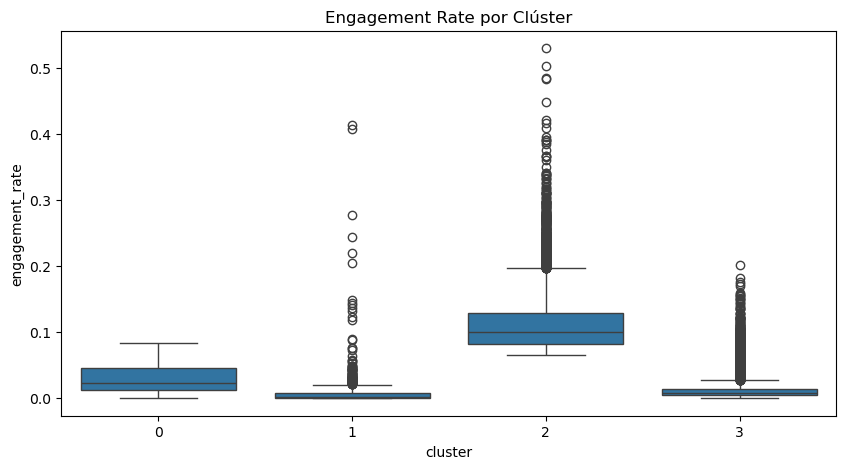

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_fr, x='cluster', y='engagement_rate')
plt.title('Engagement Rate por Clúster')
plt.show()


# PREGUNTAS SOBRE PROYECTO

In [170]:
# Crear nuevas columnas derivadas
df_fr['like_dislike_ratio'] = df_fr['likes'] / (df_fr['likes'] + df_fr['dislikes'])
df_fr['views_comments_ratio'] = df_fr['views'] / (df_fr['comment_count'] + 1)  # +1 para evitar división por cero

# ---- Agrupaciones por categoría ----

tendencias = df_fr["category_name"].value_counts().rename("Tendencias")

mas_gustan = df_fr.groupby("category_name")["likes"].mean().sort_values(ascending=False).rename("Promedio Likes")

menos_gustan = mas_gustan.sort_values().rename("Promedio Likes")

ratio_like_dislike = df_fr.groupby("category_name")["like_dislike_ratio"].mean().sort_values(ascending=False).rename("Ratio Like/Dislike")

ratio_views_comments = df_fr.groupby("category_name")["views_comments_ratio"].mean().sort_values(ascending=False).rename("Ratio Views/Comments")


## 1. Categorías con más videos en tendencia

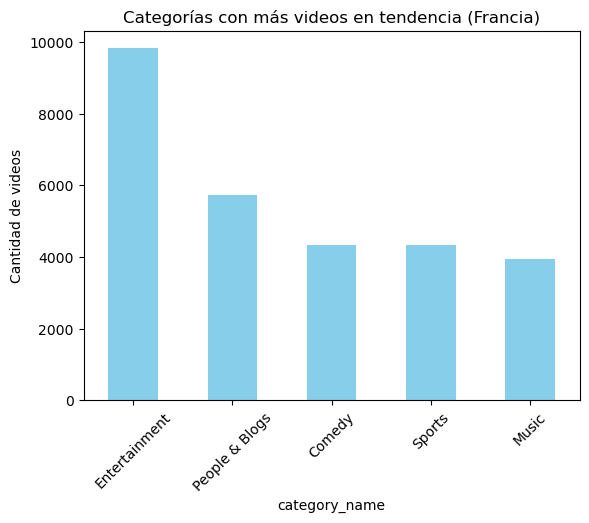

In [ ]:
# ---- Visualizaciones ----

tendencias.head(5).plot(kind="bar", color="skyblue", title="Categorías con más videos en tendencia (Francia)")
plt.ylabel("Cantidad de videos")
plt.xticks(rotation=45)
plt.show()

## 2. Categorías que más gustan

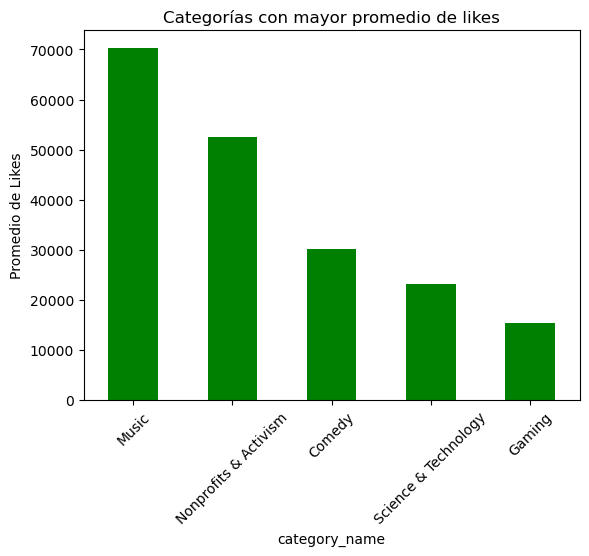

In [172]:
mas_gustan.head(5).plot(kind="bar", color="green", title="Categorías con mayor promedio de likes")
plt.ylabel("Promedio de Likes")
plt.xticks(rotation=45)
plt.show()

## 3. Categorías que menos gustan

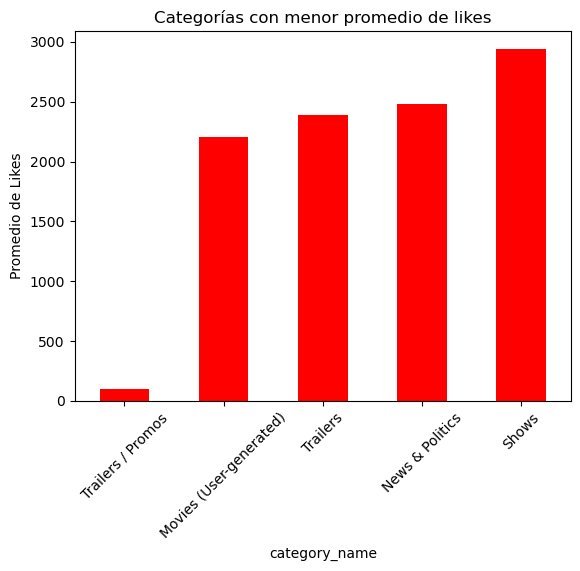

In [173]:
menos_gustan.head(5).plot(kind="bar", color="red", title="Categorías con menor promedio de likes")
plt.ylabel("Promedio de Likes")
plt.xticks(rotation=45)
plt.show()

## 4. Mejor ratio Likes / Dislikes

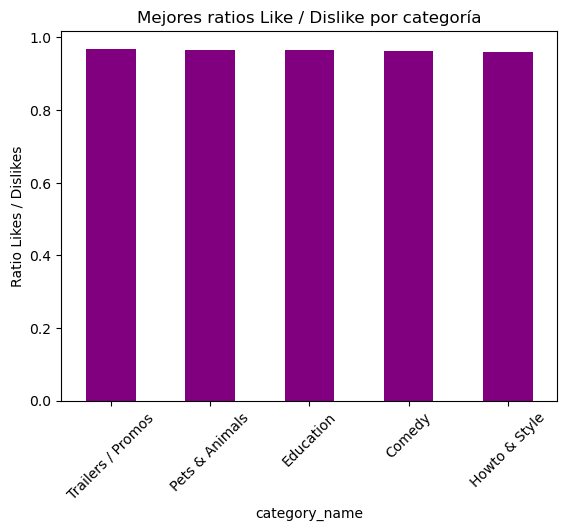

In [175]:
ratio_like_dislike.head(5).plot(kind="bar", color="purple", title="Mejores ratios Like / Dislike por categoría")
plt.ylabel("Ratio Likes / Dislikes")
plt.xticks(rotation=45)
plt.show()

## 5. Mejor ratio Views / Comments

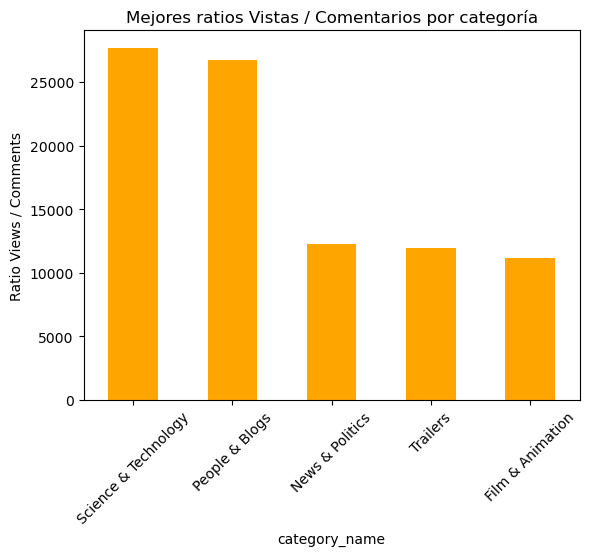

In [176]:
ratio_views_comments.head(5).plot(kind="bar", color="orange", title="Mejores ratios Vistas / Comentarios por categoría")
plt.ylabel("Ratio Views / Comments")
plt.xticks(rotation=45)
plt.show()

## Pregunta 5: Volumen de tendencia (¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?)


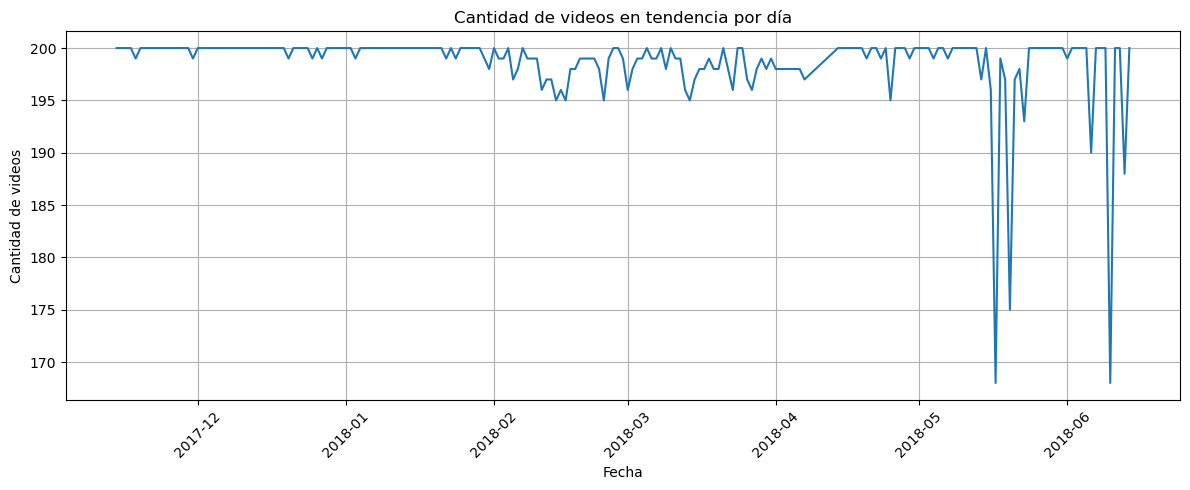

In [180]:
import matplotlib.pyplot as plt

# Asegurarse de que 'trending_date' sea datetime
df_fr['trending_date'] = pd.to_datetime(df_fr['trending_date'], errors='coerce')

# Crear la columna 'day'
df_fr['day'] = df_fr['trending_date'].dt.date

# Agrupar todos los videos por día
videosDia = df_fr.groupby('day').size()

# Graficar
plt.figure(figsize=(12, 5))
videosDia.plot(kind='line', title='Cantidad de videos en tendencia por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de videos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.show()


## Pregunta 6: Frecuencia por canal (¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?)


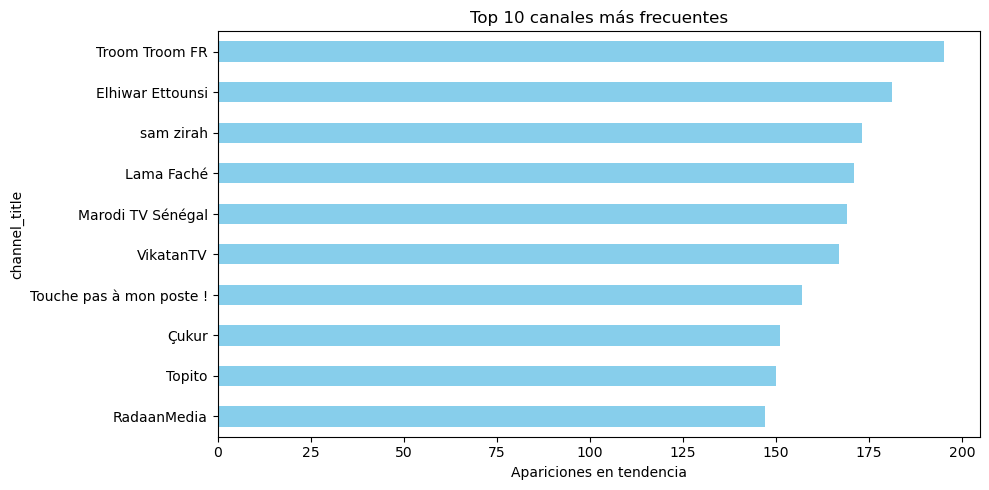

In [191]:
# Usar el DataFrame limpio
canalesFrecuencia = df_fr['channel_title'].value_counts()

# --- Top 10 canales más frecuentes ---
plt.figure(figsize=(10, 5))
canalesFrecuencia.head(10).plot(kind='barh', color='skyblue', title='Top 10 canales más frecuentes')
plt.xlabel('Apariciones en tendencia')
plt.gca().invert_yaxis()
plt.tight_layout()
# plt.savefig(imgDir + 'pregunta6_1.png')  # Descomenta si tienes imgDir
plt.show()


C:\Users\papit\AppData\Local\Temp\ipykernel_15696\4027994333.py:5: UserWarning: Glyph 26480 (\N{CJK UNIFIED IDEOGRAPH-6770}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\papit\AppData\Local\Temp\ipykernel_15696\4027994333.py:5: UserWarning: Glyph 23041 (\N{CJK UNIFIED IDEOGRAPH-5A01}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\papit\AppData\Local\Temp\ipykernel_15696\4027994333.py:5: UserWarning: Glyph 29246 (\N{CJK UNIFIED IDEOGRAPH-723E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\papit\AppData\Local\Temp\ipykernel_15696\4027994333.py:5: UserWarning: Glyph 38899 (\N{CJK UNIFIED IDEOGRAPH-97F3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\papit\AppData\Local\Temp\ipykernel_15696\4027994333.py:5: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\papit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26480 

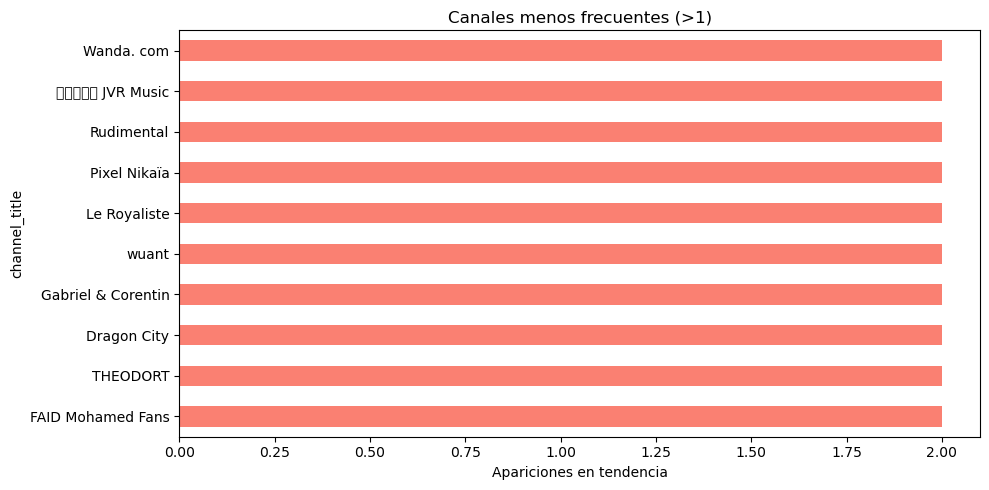

In [192]:
# --- Top 10 canales menos frecuentes (con al menos 2 apariciones) ---
plt.figure(figsize=(10, 5))
canalesFrecuencia[canalesFrecuencia > 1].tail(10).plot(kind='barh', color='salmon', title='Canales menos frecuentes (>1)')
plt.xlabel('Apariciones en tendencia')
plt.tight_layout()
# plt.savefig(imgDir + 'pregunta6_2.png')  # Descomenta si tienes imgDir
plt.show()

## Pregunta 7: Metricas por estado (¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?)


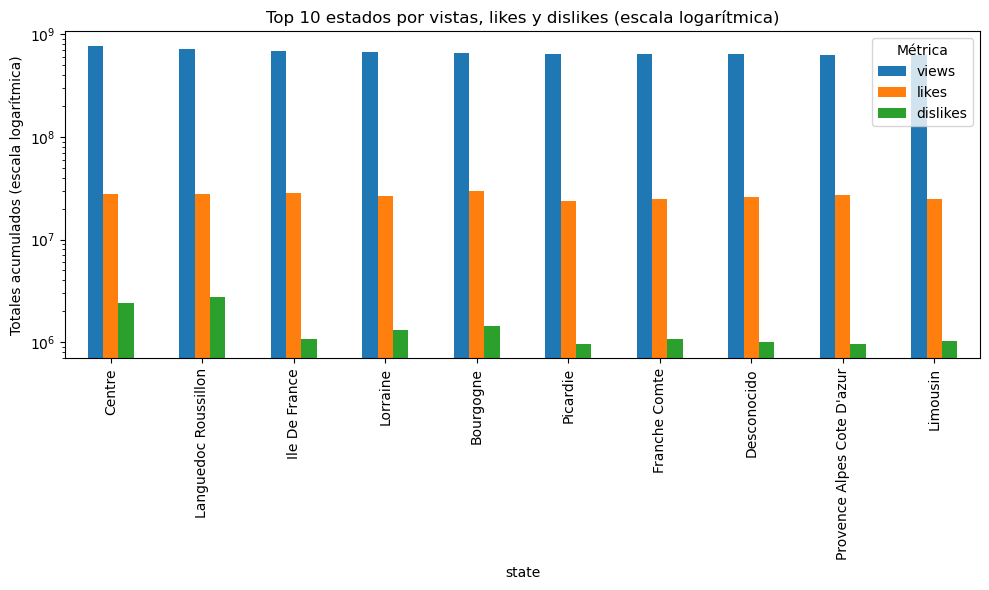

In [193]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por estado y sumar vistas, likes y dislikes
top_estados = df_fr.groupby('state')[['views', 'likes', 'dislikes']].sum()

# Seleccionar el top 10 por vistas
top10_estados = top_estados.sort_values('views', ascending=False).head(10)

# Graficar
top10_estados.plot(kind='bar', figsize=(10, 6))
plt.yscale('log')  # Escala logarítmica en Y
plt.title('Top 10 estados por vistas, likes y dislikes (escala logarítmica)')
plt.xlabel('state')
plt.ylabel('Totales acumulados (escala logarítmica)')
plt.legend(title='Métrica')
plt.tight_layout()
plt.show()



## Pregunta 8: Vistas vs comentarios (¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?)


In [ ]:
# Correlación entre vistas y comentarios
correlacion = df_fr[['views', 'comment_count']].corr()

correlacion.style.set_caption("Correlación entre Vistas y Comentarios") \
                  .background_gradient(cmap='YlGnBu') \
                  .format("{:.2f}")


,views,comment_count
views,1.00,0.71
comment_count,0.71,1.00


In [190]:
# Mostrar 10 videos más vistos y sus comentarios con estilo
topVideos = df_fr.sort_values('views', ascending=False).head(10)

# Estilizar la tabla
topVideos[['title', 'views', 'comment_count']].style \
    .set_caption("Top 10 Videos Más Vistos y Cantidad de Comentarios") \
    .background_gradient(cmap='Oranges', subset=['views']) \
    .background_gradient(cmap='Blues', subset=['comment_count']) \
    .format({'views': '{:,.0f}', 'comment_count': '{:,.0f}'})


,title,views,comment_count
5342,YouTube Rewind: The Shape of 2017 | #YouTubeRewind,"100,911,567","682,890"
5040,YouTube Rewind: The Shape of 2017 | #YouTubeRewind,"75,969,469","827,755"
35902,BTS (방탄소년단) 'FAKE LOVE' Official MV,"65,396,157","1,040,912"
35626,BTS (방탄소년단) 'FAKE LOVE' Official MV,"62,796,390","905,925"
33720,Childish Gambino - This Is America (Official Video),"60,776,509","232,723"
4804,YouTube Rewind: The Shape of 2017 | #YouTubeRewind,"52,611,730","702,790"
33469,Childish Gambino - This Is America (Official Video),"47,169,016","194,822"
1598,"Luis Fonsi, Demi Lovato - Échame La Culpa","47,078,714","101,453"
16877,To Our Daughter,"44,818,108",0
16608,To Our Daughter,"40,801,423",0


In [194]:
# Filtrar los registros del video "To Our Daughter"
video_test = df_fr[df_fr['title'] == "To Our Daughter"][['trending_date', 'views', 'comment_count', 'comments_disabled']]

# Mostrar
print(video_test.sort_values('trending_date'))


      trending_date     views  comment_count  comments_disabled
16191    2018-02-05  20921796              0               True
16389    2018-02-06  35832484              0               True
16608    2018-02-07  40801423              0               True
16877    2018-02-08  44818108              0               True


## Pregunta 9: Modelo de prediccion (¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?)


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Variables independientes (features) y objetivo (target)
x = df_fr[['likes', 'dislikes', 'comment_count']]
y = df_fr['views']

# Dividir los datos: 80% entrenamiento, 20% prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)

# Evaluar el modelo
r2 = modelo.score(x_test, y_test)
print(f'\nPrecisión del modelo (R²): {r2:.4f}')



Precisión del modelo (R²): 0.8487
